In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [2]:
dd=pd.read_csv(r'F:\VIRU\New folder\Italy.csv')

In [3]:
dd.head()

,months,sales
0,2014-01,6
1,2014-02,1
2,2014-03,8
3,2014-04,0
4,2014-05,2


In [4]:
dd.tail()

,months,sales
79,2020-08,196
80,2020-09,958
81,2020-10,64
82,2020-11,263
83,2020-12,925


In [5]:
dd['months']=pd.to_datetime(dd['months'])

In [6]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

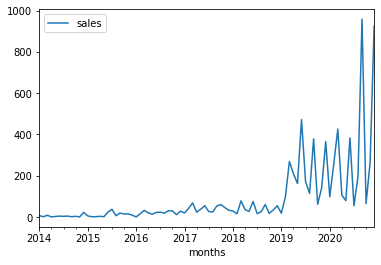

In [7]:
dd.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
dfuler = adfuller(dd['sales'])

In [10]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(0.7838039201892243,
 0.9913701833627071,
 12,
 71,
 {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957},
 792.1599362763529)

In [11]:
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

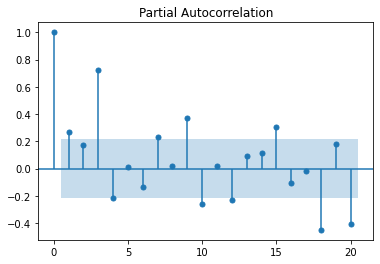

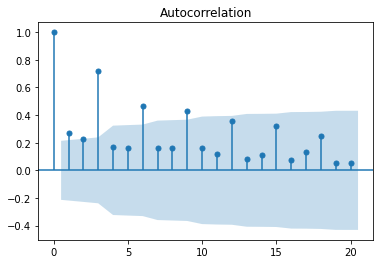

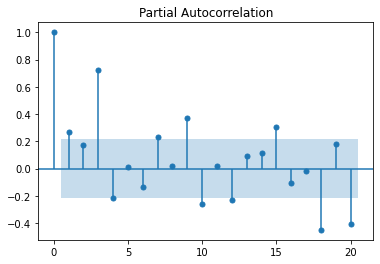

In [14]:
plot_acf(dd['sales'],lags=20)
plot_pacf(dd['sales'],lags=20)

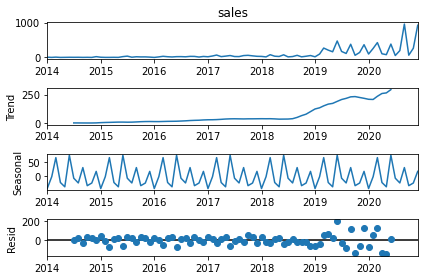

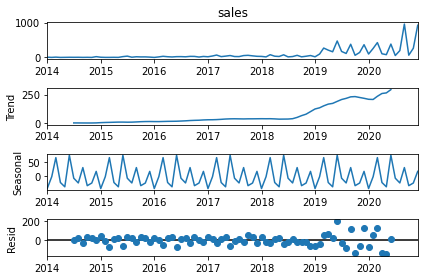

In [15]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [16]:
import statsmodels.api as sm

In [64]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(3,1,0),seasonal_order=(2,1,0,12))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [65]:
dd['forecast']=results.predict(start=73,end=83,dynamic=True)

<AxesSubplot:xlabel='months'>

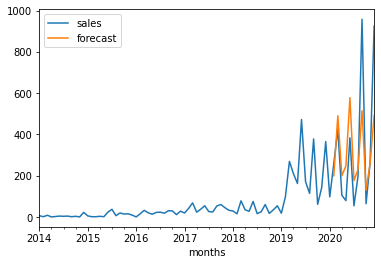

In [66]:
dd[['sales','forecast']].plot()

In [67]:
output=results.forecast(24)

In [68]:
output

2021-01-01      83.029529
2021-02-01     370.808542
2021-03-01    1001.397014
2021-04-01     153.451170
2021-05-01     332.960546
2021-06-01    1013.750115
2021-07-01     116.824713
2021-08-01     401.424679
2021-09-01    1239.177104
2021-10-01      92.363061
2021-11-01     468.505571
2021-12-01    1188.416228
2022-01-01     121.341509
2022-02-01     591.328937
2022-03-01    1256.134225
2022-04-01     200.692432
2022-05-01     542.620172
2022-06-01    1257.214413
2022-07-01     168.628166
2022-08-01     622.111905
2022-09-01    1517.398474
2022-10-01     150.911341
2022-11-01     695.492190
2022-12-01    1456.001884
Freq: MS, Name: predicted_mean, dtype: float64

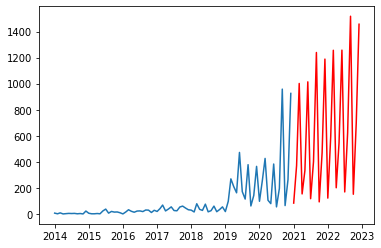

In [69]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')

In [70]:
from pandas.tseries.offsets import DateOffset

In [74]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,25)]

In [92]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [76]:
future_dates_dd.tail()

,sales,forecast
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN
2022-12-01,NaN,NaN


In [77]:
future_dd=pd.concat([dd,future_dates_dd])

In [90]:
future_dd['forecast']=results.predict(start=83,end=107,dynamic=True)

<AxesSubplot:>

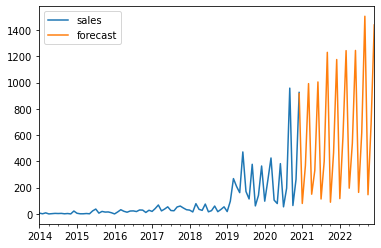

In [91]:
future_dd[['sales','forecast']].plot()